In [1]:
%pip install mlxtend


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import seaborn as sns
import matplotlib.pyplot as plt

/Users/bob/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/bob/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [3]:
data_set_location  = 'data/'

In [4]:

orders_df = pd.read_csv(data_set_location + 'orders.csv')
product_df = pd.read_csv(data_set_location + 'products.csv')

order_products_train_df = pd.read_csv(data_set_location + 'order_products__train.csv')
order_products_prior_df = pd.read_csv(data_set_location + 'order_products__prior.csv')

In [5]:
df = pd.concat([order_products_train_df, order_products_prior_df] )
df = pd.merge(df, product_df, on='product_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15


In [6]:
print("Number of unique products in the dataset: ", len(df['product_id'].unique()))

Number of unique products in the dataset:  49685


In [7]:
df_by_product = df.groupby(['product_id' ,  'product_name'])['order_id'].count().reset_index().rename(columns = {'order_id': 'order_count'})
df_by_product = df_by_product.sort_values(by='order_count', ascending=False)[:100].reset_index(drop=True)
df_by_product.head()

,product_id,product_name,order_count
0,24852,Banana,491291
1,13176,Bag of Organic Bananas,394930
2,21137,Organic Strawberries,275577
3,21903,Organic Baby Spinach,251705
4,47209,Organic Hass Avocado,220877


In [8]:
# keep only the products that appear in the top 100
products_in_top_100 = df_by_product['product_id'].unique()

In [9]:
df_by_top_product = df[ df['product_id'].isin(products_in_top_100 ) ]

print( "Number of orders from the top 100 products: ", len( df_by_top_product['order_id'].unique()) )
print( "Number of orders in the dataset : ", len(df['order_id'].unique()) )

/Users/bob/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:516: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


Number of orders from the top 100 products:  2444982
Number of orders in the dataset :  3346083


In [10]:
df_by_top_product.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
3,1,49683,4,0,Cucumber Kirby,83,4
5,1,13176,6,0,Bag of Organic Bananas,24,4
6,1,47209,7,0,Organic Hass Avocado,24,4
7,1,22035,8,1,Organic Whole String Cheese,21,16
9,36,19660,2,1,Spring Water,115,7


In [11]:
df_cross = pd.crosstab(
 df_by_top_product['order_id'],
 df_by_top_product['product_name'] ,
 values=df_by_top_product['reordered'],
 aggfunc='count' , 
 normalize=False, 
 dropna=False
 ).fillna(0)

df_cross.head()

/Users/bob/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/pivot.py:215: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  cartesian_product(table.columns.levels), names=table.columns.names
/Users/bob/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/util.py:54: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [tile_compat(np.repeat(x, b[i]), np.product(a[i])) for i, x in enumerate(X)]
/Users/bob/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/util.py:54: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [tile_compat(np.repeat(x, b[i]), np.product(a[i])) for i, x in enumerate(X)]


product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_support = apriori(df_cross, min_support=0.01, use_colnames=True, low_memory=True)
df_support.head()

/Users/bob/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.016062,(100% Raw Coconut Water)
1,0.025814,(100% Whole Wheat Bread)
2,0.015800,(2% Reduced Fat Milk)
3,0.035694,(Apple Honeycrisp Organic)
4,0.029101,(Asparagus)


In [13]:
df_rule_by_permutation = association_rules(df_support, metric="lift", min_threshold=1)
df_rule_by_permutation.sort_values('lift', ascending=False)

df_rule_by_permutation.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bag of Organic Bananas),(Organic Baby Spinach),0.161527,0.102948,0.021517,0.133208,1.293944,0.004888,1.034911,0.270932
1,(Organic Baby Spinach),(Bag of Organic Bananas),0.102948,0.161527,0.021517,0.209007,1.293944,0.004888,1.060026,0.253239
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.161527,0.090339,0.026487,0.163981,1.815175,0.011895,1.088087,0.535603
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.090339,0.161527,0.026487,0.293199,1.815175,0.011895,1.186294,0.493688
4,(Bag of Organic Bananas),(Organic Raspberries),0.161527,0.058325,0.017294,0.107065,1.835662,0.007873,1.054584,0.542936


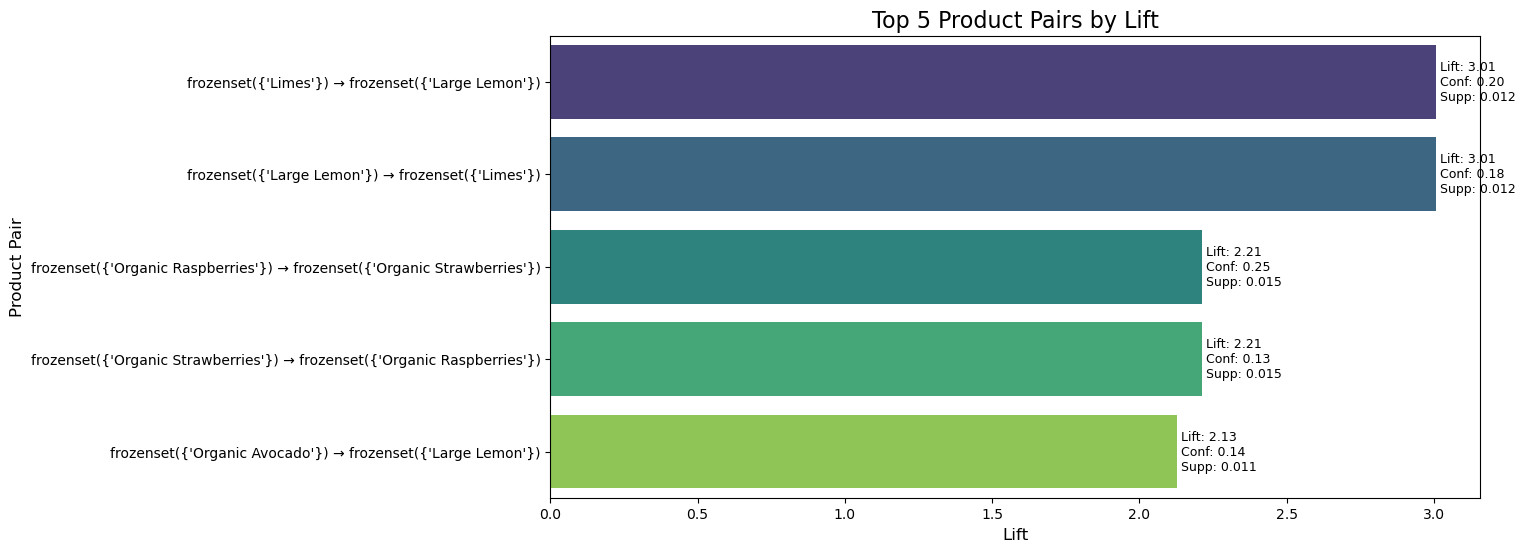

In [14]:
top_5 = df_rule_by_permutation.sort_values('lift', ascending=False).head()


plot_df = pd.DataFrame({
    'Product Pair': [f"{ant} → {con}" for ant, con in zip(top_5['antecedents'], top_5['consequents'])],
    'Lift': top_5['lift'],
    'Support': top_5['support'],
    'Confidence': top_5['confidence']
})


plt.figure(figsize=(12, 6))


ax = sns.barplot(x='Lift', y='Product Pair', data=plot_df, palette='viridis')


plt.title('Top 5 Product Pairs by Lift', fontsize=16)
plt.xlabel('Lift', fontsize=12)
plt.ylabel('Product Pair', fontsize=12)


for i, v in enumerate(plot_df['Lift']):
    ax.text(v, i, f' Lift: {v:.2f}\n Conf: {plot_df["Confidence"].iloc[i]:.2f}\n Supp: {plot_df["Support"].iloc[i]:.3f}', 
            va='center', fontsize=9)


